In [ ]:
The purpose of this assignment is to __predict the slot of parking using ARIMA.__

In [ ]:
### Preprocessing to get the tidy dataframe

In [25]:
# Import the library we need, which is Pandas and Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
# Import statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

In [26]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

In [41]:
# Read the csv file 
df = pd.read_csv('sampledata.csv')

In [40]:
df.head()

,Floornum,Slotnum,Empid,Vehicletype,Vehiclenum,Date,Sensor
0,1,101,16000307,Toyota,EH 5103,16-11-2019 11:43:25,0.0
1,1,102,16000804,Skoda,MJ 1435,29-10-2019 08:22:51,0.0
2,1,103,16010329,Suzuki,OW 9335,13-11-2019 09:30:28,0.0
3,1,104,16010403,BMW,DP 7713,21-11-2019 10:00:33,1.0
4,1,138,16000307,Toyota,EH 5103,18-10-2019 09:58:01,0.0


In [42]:
from datetime import datetime

df['Date']  =  pd.to_datetime(df['Date'],infer_datetime_format = True)             #convert from string to datetime
print(df.Date.min())
# Convert date in datetimedelta figure starting from zero
df["timeIndex"] = df.Date - df.Date.min()
df  =  df.set_index(['Date'])
df.head(5)

2019-10-13 10:05:33


,Floornum,Slotnum,Empid,Vehicletype,Vehiclenum,Sensor,timeIndex
Date,,,,,,,
2019-11-16 11:43:25,1,101,16000307,Toyota,EH 5103,0.0,34 days 01:37:52
2019-10-29 08:22:51,1,102,16000804,Skoda,MJ 1435,0.0,15 days 22:17:18
2019-11-13 09:30:28,1,103,16010329,Suzuki,OW 9335,0.0,30 days 23:24:55
2019-11-21 10:00:33,1,104,16010403,BMW,DP 7713,1.0,38 days 23:55:00
2019-10-18 09:58:01,1,138,16000307,Toyota,EH 5103,0.0,4 days 23:52:28


In [30]:
# Sort the data frame by date
df = df.sort_values(by = "Date")

In [31]:
df.head()

,Floornum,Slotnum,Empid,Vehicletype,Vehiclenum,Sensor,timeIndex
Date,,,,,,,
2019-10-13 10:05:33,3,374,16010403,BMW,DP 7713,1.0,0 days 00:00:00
2019-10-18 09:58:01,1,138,16000307,Toyota,EH 5103,0.0,4 days 23:52:28
2019-10-19 08:58:01,1,182,16000307,Toyota,EH 5103,0.0,5 days 22:52:28
2019-10-20 09:58:01,2,202,16000307,Toyota,EH 5103,0.0,6 days 23:52:28
2019-10-21 10:58:02,2,272,16000307,Toyota,EH 5103,0.0,8 days 00:52:29


In [32]:
df.isnull().count()

Floornum       80
Slotnum        80
Empid          80
Vehicletype    80
Vehiclenum     80
Sensor         80
timeIndex      80
dtype: int64

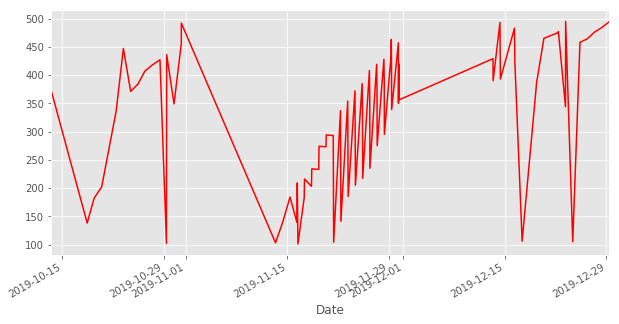

In [12]:
#df.Slotnum.plot(color = 'Red')

In [14]:
# Convert to months using the timedelta function
df["timeIndex"] =  df["timeIndex"]/np.timedelta64(1, 'M')

In [15]:
df.timeIndex.head()

Date
2019-10-13 10:05:33    0.000000
2019-10-18 09:58:01    0.164103
2019-10-19 08:58:01    0.195588
2019-10-20 09:58:01    0.229812
2019-10-21 10:58:02    0.264037
Name: timeIndex, dtype: float64

In [16]:
# Round the number to 0
df["timeIndex"] = df["timeIndex"].round(0).astype(int)

In [17]:
df.timeIndex.tail()

Date
2019-12-25 09:31:28    2
2019-12-26 09:31:28    2
2019-12-27 09:31:28    2
2019-12-28 09:31:28    2
2019-12-29 09:31:28    3
Name: timeIndex, dtype: int32

In [21]:
df.head()

,Floornum,Slotnum,Empid,Vehicletype,Vehiclenum,Sensor,timeIndex
Date,,,,,,,
2019-10-13 10:05:33,3,374,16010403,BMW,DP 7713,1.0,0
2019-10-18 09:58:01,1,138,16000307,Toyota,EH 5103,0.0,0
2019-10-19 08:58:01,1,182,16000307,Toyota,EH 5103,0.0,0
2019-10-20 09:58:01,2,202,16000307,Toyota,EH 5103,0.0,0
2019-10-21 10:58:02,2,272,16000307,Toyota,EH 5103,0.0,0


In [47]:
df.isnull().sum()

Floornum       0
Slotnum        0
Empid          0
Vehicletype    0
Vehiclenum     0
Sensor         2
timeIndex      0
dtype: int64

In [49]:
new_df = df.dropna(axis = 0 , inplace = False)


In [51]:
new_df.isnull().sum()

Floornum       0
Slotnum        0
Empid          0
Vehicletype    0
Vehiclenum     0
Sensor         0
timeIndex      0
dtype: int64

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
def generate():
    decomposed_dataset  =  seasonal_decompose(df.Slotnum,model ='additive')
    figure  =  decomposed_dataset.plot()
    plt.show()
    return decomposed_dataset
decomposed_dataset = generate()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None